In [1]:
import numpy as np 
import matplotlib.pyplot as plt

## Integration

In [2]:
from scipy import integrate
integrate.quad(lambda x: np.sin(x), 0,1)   # returns (result, error)

(0.45969769413186023, 5.103669643922839e-15)

In [6]:
# Compare numeric outcome to anti-derivative outcome:
-np.cos(1) + np.cos(0)

0.45969769413186023

## Finding roots

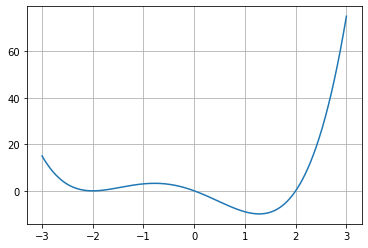

In [7]:
def f(x):
    return (x - 2) * x * (x + 2)**2
x=np.linspace(-3, 3, 1000)
plt.grid()
plt.plot(x, f(x));

 message: The solution converged.
 success: True
  status: 1
     fun: [ 8.527e-14]
       x: [ 2.422e+00]
  method: hybr
    nfev: 9
    fjac: [[-1.000e+00]]
       r: [-6.467e+01]
     qtf: [ 5.335e-08]
2.4222178065625983 20.000000000000085


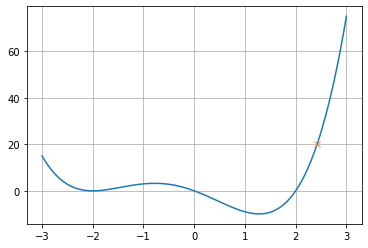

In [8]:
from scipy.optimize import root
sol = root(lambda x: f(x)-20, x0=2.0)  # find x such that f(x)-20=0. Initial guess: x0
print(sol)
x_sol=sol.x[0]
print(x_sol, f(x_sol))
plt.grid()
plt.plot(x, f(x));
plt.plot(x_sol, f(x_sol), 'x');

In [11]:
sol = root(lambda x: f(x)+20, x0=2.0)  # find x such that f(x)+20=0. Initial guess: x0
print(sol)

 message: The iteration is not making good progress, as measured by the 
            improvement from the last ten iterations.
 success: False
  status: 5
     fun: [ 1.009e+01]
       x: [ 1.281e+00]
  method: hybr
    nfev: 22
    fjac: [[-1.000e+00]]
       r: [ 1.030e-02]
     qtf: [-1.009e+01]


In [12]:
# Find root of two-dimensional function:
sol = root(lambda x: [5*x[0]+7*x[1]-3, 3*x[0]+9*x[1]-5], x0=[0,0])
print(sol)
print(sol.x)

 message: The solution converged.
 success: True
  status: 1
     fun: [ 0.000e+00  0.000e+00]
       x: [-3.333e-01  6.667e-01]
  method: hybr
    nfev: 5
    fjac: [[-8.575e-01 -5.145e-01]
           [ 5.145e-01 -8.575e-01]]
       r: [-5.831e+00 -1.063e+01 -4.116e+00]
     qtf: [-1.122e-11 -5.986e-12]
[-0.33333333  0.66666667]


## Optimization

In [13]:
from scipy.optimize import minimize_scalar
print(minimize_scalar(f))

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -9.914949590828147
       x: 1.2807764040333458
     nit: 11
    nfev: 14


In [14]:
print(minimize_scalar(f, bounds=(-3,-1), method='bounded'))

 message: Solution found.
 success: True
  status: 0
     fun: 3.2836517984978577e-13
       x: -2.000000202597239
     nit: 12
    nfev: 12


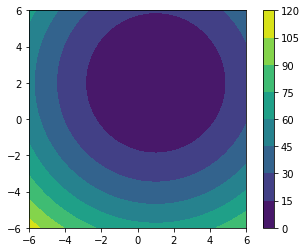

In [21]:
from scipy.optimize import minimize

def g(vars):
    x,y = vars
    return (x-1)**2 + (y-2)**2

x=np.linspace(-6, 6, 101)
y=np.linspace(-6, 6, 101)
plt.contourf(x, y, g(np.meshgrid(x,y)))
plt.axis('scaled')
plt.colorbar();

In [22]:
minimize(g, (0,0), method='Nelder-Mead')

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1.869184419935774e-09
             x: [ 1.000e+00  2.000e+00]
           nit: 66
          nfev: 127
 final_simplex: (array([[ 1.000e+00,  2.000e+00],
                       [ 1.000e+00,  2.000e+00],
                       [ 9.999e-01,  2.000e+00]]), array([ 1.869e-09,  2.928e-09,  3.002e-09]))

## Statistics

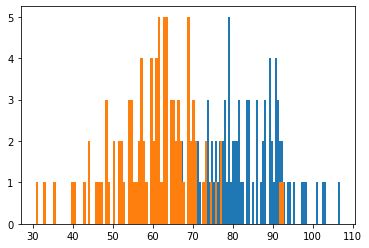

TtestResult(statistic=14.839513414481315, pvalue=5.521967909261471e-34, df=198.0)


In [23]:
from scipy.stats import ttest_ind
grades_5784 = np.random.normal(80,10,size=100)
grades_5785 = np.random.normal(60,10,size=100)
plt.hist(grades_5784, bins=100)
plt.hist(grades_5785, bins=100); plt.show()
print(ttest_ind(grades_5784, grades_5785))   # Test the hypothesis that the average grade is the same. pvalue = probility that the average is the same.